# European Travel Destination

In this project, a **CSV** file with European travel destinations will be explored. We are trying to explore the factors that influence tourists interest across those destinations and gain insight into potential use cases for this data. 


We start by importing all the necessary libraries. 

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


The next step, we want to look through **destination.csv** to understand the dataset. To do this, we first need to read the **csv** file and assign to a variable `destinations`.

In [3]:
destinations = pd.read_csv("destinations.csv", encoding='unicode_escape')
destinations.head()

,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Famous Foods,Language,Best Time to Visit,Cost of Living,Safety,Cultural Significance,Description
0,Rome,Lazio,Italy,City,41.902782,12.496366,14 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","The capital city, known for its historical lan...","A hub of ancient history and modern culture, w..."
1,Florence,Tuscany,Italy,City,43.769581,11.255772,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A Renaissance city famous for its art, archite...","Home to world-class museums, including the Uff..."
2,Venice,Veneto,Italy,City,45.435559,12.336196,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A unique city built on canals, known for its g...","An iconic city of water, renowned for romantic..."
3,Milan,Lombardy,Italy,City,45.464643,9.188540,7 million,Euro,Roman Catholic,"Risotto, Ossobuco, Panettone",Italian,Spring (April-May) or Fall (Sept-Oct),High,"Generally safe, but watch out for pickpockets","A fashion capital known for its shopping, muse...","A modern city with an ancient soul, featuring ..."
4,Naples,Campania,Italy,City,40.851330,14.254720,5 million,Euro,Roman Catholic,"Pizza, Pasta, Cannoli",Italian,Spring (April-May) or Fall (Sept-Oct),Medium,"Generally safe, but be aware of pickpockets","A vibrant city known for its delicious food, h...","Famous for pizza, Pompeii, and proximity to th..."


Before we do anything to the data, we take a look at the information contained in each columns such as the number of rows, missing values, and data types.

In [4]:
destinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination                  209 non-null    object 
 1   Region                       209 non-null    object 
 2   Country                      209 non-null    object 
 3   Category                     209 non-null    object 
 4   Latitude                     209 non-null    float64
 5   Longitude                    209 non-null    float64
 6   Approximate Annual Tourists  209 non-null    object 
 7   Currency                     209 non-null    object 
 8   Majority Religion            209 non-null    object 
 9   Famous Foods                 209 non-null    object 
 10  Language                     209 non-null    object 
 11  Best Time to Visit           209 non-null    object 
 12  Cost of Living               209 non-null    object 
 13  Safety              

From this dataset, we could see it contains the **Location Data**, **Tourists Information**, **Demographics & Cultures**, **Living Standards** and **Descriptions** of the European destination. We are trying to use these informations to answer some questions like:
- Does the cost of living affect the number of tourists?
- Are certain time of the year more popular for certain regions?
- Is culture or unique cuisine a key attraction for the tourists?
- What are the common charateristics of the most visited destinations?

We will start by taking the **Cost of Living** and **Approximate Annual Tourists** columns from `destinations` and store them into `living_costs` and `num_tourists`, respectively. Those variables will be inspected to ensure the data is suitable for our analysis.

In [5]:
living_costs = destinations["Cost of Living"]
num_tourists = destinations["Approximate Annual Tourists"]

In [29]:
living_costs.unique()

0      14 million
1      10 million
2      10 million
3       7 million
4       5 million
          ...    
204       100,000
205        50,000
206        25,000
207        20,000
208        10,000
Name: Approximate Annual Tourists, Length: 209, dtype: object

The variable `living_costs` contains of 6 categories:
- "Free"
- "Varies"
- "Medium"
- "Medium-high"
- "High"
- "Extremely high"

In [7]:
num_tourists.unique()

array(['14 million', '10 million', '7 million', '5 million', '3 million',
       '2 million', '1.5 million', '1 million', '12.7 million',
       '3.5 million', '2.5 million', '8 million', '12 million',
       '35-40 million', '4 million', '800,000',
       '10 million (region-wide)', '12 million (region-wide)',
       '7.5 million', '500,000', '400,000', '200,000', '300,000',
       '100,000', '13.5 million', '50,000', '12.5 million',
       '2 million (tourists)', '150,000', '350,000', '15 million',
       '25 million', '25,000', '20,000', '10,000'], dtype=object)

The series variable `num_tourists` contains strings i.e. "million", "(region-wide)", and "(tourists)". The figures within the series is converted to actual numbers and store in `num_tourists_updated` for our analysis. The label "region-wide" and "tourists" on the data of `num_tourists` are ignored. Noticed that there is an element in `num_tourists` has a data of "35-40 million", we will take the middle of the range and convert it to number.

In [26]:
num_tourists_array = num_tourists.to_numpy()
num_tourists_array
num_tourists_updated = []
for i in num_tourists_array:
    if i == "35-40 million":
        num_tourists_updated.append(int(37.5 * (10 ** 6)))
    elif "million" in i:
        index_m = i.index("m")
        number = i[:index_m]
        number = float(number)
        number = int(number * (10 ** 6))
        num_tourists_updated.append(number)
    else:
        i = i.replace(',', '')
        i = int(i)
        num_tourists_updated.append(i)
num_tourists_updated = pd.Series(num_tourists_updated)
num_tourists_updated
        

0      14000000
1      10000000
2      10000000
3       7000000
4       5000000
         ...   
204      100000
205       50000
206       25000
207       20000
208       10000
Length: 209, dtype: int64

In [30]:
num_tourists_living_costs_dict = {"Living costs": living_costs, "Number of Tourists": num_tourists_updated}
num_tourists_living_costs_pd = pd.DataFrame(num_tourists_living_costs_dict)
num_tourists_living_costs_pd

,Living costs,Number of Tourists
0,Medium-high,14000000
1,Medium-high,10000000
2,Medium-high,10000000
3,High,7000000
4,Medium,5000000
...,...,...
204,Medium-high,100000
205,Free,50000
206,Medium,25000
207,Medium,20000


(array([174.,  13.,  13.,   7.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([1.0000e+04, 3.7590e+06, 7.5080e+06, 1.1257e+07, 1.5006e+07,
        1.8755e+07, 2.2504e+07, 2.6253e+07, 3.0002e+07, 3.3751e+07,
        3.7500e+07]),
 <BarContainer object of 10 artists>)

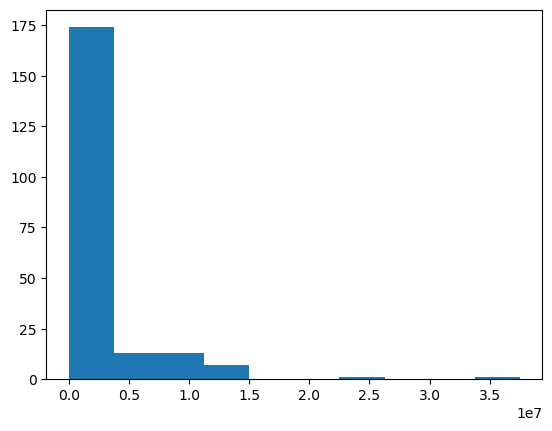

In [28]:
plt.hist(num_tourists_living_costs_pd["Number of Tourists"])